In [1]:
''''
///////////////////////ROADMAP///////////////////////////////////
State the question and determine required data
Acquire the data in an accessible format
Identify and correct missing data points/anomalies as required
Prepare the data for the machine learning model
Establish a baseline model that you aim to exceed
Train the model on the training data
Make predictions on the test data
Compare predictions to the known test set targets and calculate performance metrics
If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
Interpret model and report results visually and numerically
'''
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

"'\nROADMAP\nState the question and determine required data\nAcquire the data in an accessible format\nIdentify and correct missing data points/anomalies as required\nPrepare the data for the machine learning model\nEstablish a baseline model that you aim to exceed\nTrain the model on the training data\nMake predictions on the test data\nCompare predictions to the known test set targets and calculate performance metrics\nIf performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique\nInterpret model and report results visually and numerically\n"

In [116]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read in data and display first 5 rows
data_iz = pd.read_csv('Combined_Izmir_full.csv')

data_iz.head(5)
#check Missing Data
#print('The shape of our data_iz is:', data_iz.shape)

# Descriptive statistics for each column
#data_iz.describe()

,Floor_Area,Floor_Number,ofPeople_service,ofPeople_living,ofPeople_bedroom,Construction_recorded,schedule_recorded,Window_Count,w_north,w_north-east,...,o_east,o_south-east,o_south,o_south-west,o_west,o_north-west,Cooling,Heating,Lighting,Equipment
0,50.33,5,0.114,0.114,0.057,0,0,4,0,0,...,0,0,0,0,1,1,53.25,37.55,7.56,2.38
1,61.50,3,0.102,0.102,0.051,1,2,3,0,1,...,0,0,0,0,1,1,21.82,23.23,7.02,2.38
2,77.37,2,0.048,0.048,0.024,0,0,4,0,1,...,1,0,0,0,0,0,31.13,30.83,11.55,2.38
3,150.28,4,0.051,0.051,0.026,0,2,5,0,1,...,1,1,1,0,0,1,56.48,62.20,6.83,2.38
4,105.60,1,0.048,0.048,0.024,0,2,3,0,0,...,1,1,0,0,1,1,50.08,23.49,7.05,2.38


In [105]:
'''
dataIZ = pd.read_csv('Combined_Izmir_full.csv')
Cooling = dataIZ['Cooling']
Heating = dataIZ['Heating']
Lighting = dataIZ['Lighting']

data = (Cooling, Heating, Lighting)
colors = ("b", "r", "y")
y = Cooling.index

fig, ax = plt.subplots(

for i in range(len(data)):
    ax.scatter(y, data[i], c= colors[i], alpha=0.25)

ax.set_xlabel('Case number')
ax.set_ylabel('Energy Demand(kWh/sqm)')
plt.show()
'''

'\ndataIZ = pd.read_csv(\'Combined_Izmir_full.csv\')\nCooling = dataIZ[\'Cooling\']\nHeating = dataIZ[\'Heating\']\nLighting = dataIZ[\'Lighting\']\n\ndata = (Cooling, Heating, Lighting)\ncolors = ("b", "r", "y")\ny = Cooling.index\n\nfig, ax = plt.subplots(\n\nfor i in range(len(data)):\n    ax.scatter(y, data[i], c= colors[i], alpha=0.25)\n\nax.set_xlabel(\'Case number\')\nax.set_ylabel(\'Energy Demand(kWh/sqm)\')\nplt.show()\n'

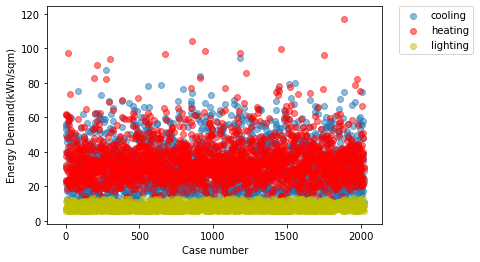

<Figure size 3600x720 with 0 Axes>

In [117]:
import matplotlib.patches as mpatches
Cooling = dataIZ['Cooling']
Heating = dataIZ['Heating']
Lighting = dataIZ['Lighting']
data = (Cooling, Heating, Lighting)
plt.xlabel('Case number')
plt.ylabel('Energy Demand(kWh/sqm)')
plt.scatter(Cooling.index, Cooling, label="cooling",  alpha=0.50)
plt.scatter(Heating.index, Heating, c='r', label="heating", alpha=0.50)
plt.scatter(Lighting.index, Lighting, c='y',label="lighting", alpha=0.50)    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(50,10))
plt.show()

In [118]:
# Use numpy to convert to arrays
import numpy as np
# just one time execute
labelCool = np.array(data_iz['Cooling'])
labelHeat = np.array(data_iz['Heating'])
labelLight = np.array(data_iz['Lighting'])
labelEquip = np.array(data_iz['Equipment'])

# we do not drop Lighting because we will use that column to tune the model
data_iz= data_iz.drop(['Cooling', 'Heating','Equipment'], axis = 1)
feature_list = list(data_iz.columns)
data_iz = np.array(data_iz)
data_iz

array([[5.0330e+01, 5.0000e+00, 1.1400e-01, ..., 1.0000e+00, 1.0000e+00,
        7.5600e+00],
       [6.1500e+01, 3.0000e+00, 1.0200e-01, ..., 1.0000e+00, 1.0000e+00,
        7.0200e+00],
       [7.7370e+01, 2.0000e+00, 4.8000e-02, ..., 0.0000e+00, 0.0000e+00,
        1.1550e+01],
       ...,
       [4.8400e+01, 3.0000e+00, 4.6000e-02, ..., 0.0000e+00, 1.0000e+00,
        5.8200e+00],
       [1.3793e+02, 1.0000e+00, 1.3400e-01, ..., 1.0000e+00, 1.0000e+00,
        8.3300e+00],
       [1.1235e+02, 3.0000e+00, 6.1000e-02, ..., 0.0000e+00, 0.0000e+00,
        8.9200e+00]])

In [175]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() 
X_scale = min_max_scaler.fit_transform(data_iz)

def normalize(v):
    return (v- min(v))/(max(v)-min(v))
Y_norm = normalize(labelLight)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_norm, test_size = 0.1, random_state = 42)

In [191]:
#Import RandomForest
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42, verbose = 1, max_depth = 2)
# Train the model on training data
rf.fit(X_train, Y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [169]:
'''
n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
        
random_grid = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'bootstrap': bootstrap}

#Import RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, verbose = 2)
# Train the model on training data
rf_Random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, cv=5)
rf_Random.fit(X_train, Y_train)
'''

"\nn_estimators = [100, 200, 300, 400, 500]\nmax_features = ['auto', 'sqrt']\nmax_depth = [5, 10, 20, 30, 40, 50]\nmin_samples_split = [2, 5, 10]\nmin_samples_leaf = [1, 2, 4]\nbootstrap = [True, False]\n        \nrandom_grid = {'n_estimators': n_estimators,\n                       'max_features': max_features,\n                       'max_depth': max_depth,\n                       'min_samples_split': min_samples_split,\n                       'min_samples_leaf': min_samples_leaf,\n                       'bootstrap': bootstrap}\n\n#Import RandomForest\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Instantiate model with 1000 decision trees\nrf = RandomForestRegressor(n_estimators = 1000, random_state = 42, verbose = 2)\n# Train the model on training data\nrf_Random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, cv=5)\nrf_Random.fit(X_train, Y_train)\n"

In [192]:
from sklearn import metrics
from scipy import stats

#Use the forest's predict method on the test data
pred = rf.predict(X_test)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

score = mean_absolute_percentage_error(Y_test, pred)
print("Final score (MAPE): {}".format(score))

score = metrics.mean_absolute_error(pred,Y_test)
print("Final score (MAE): {}".format(score))

slope, intercept, r_value, p_value, std_err = stats.linregress(Y_test, pred)
score = np.power(r_value,2)
print("Final score (r2): {}".format(score))

score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Final score (RMSE): {}".format(score))

Final score (MAPE): 27.974076400081195
Final score (MAE): 0.05377216824897367
Final score (r2): 0.908341197591953
Final score (RMSE): 0.06694849697730322


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
